<a href="https://colab.research.google.com/github/JeanRintoul/Covid-19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TypeError: ignored

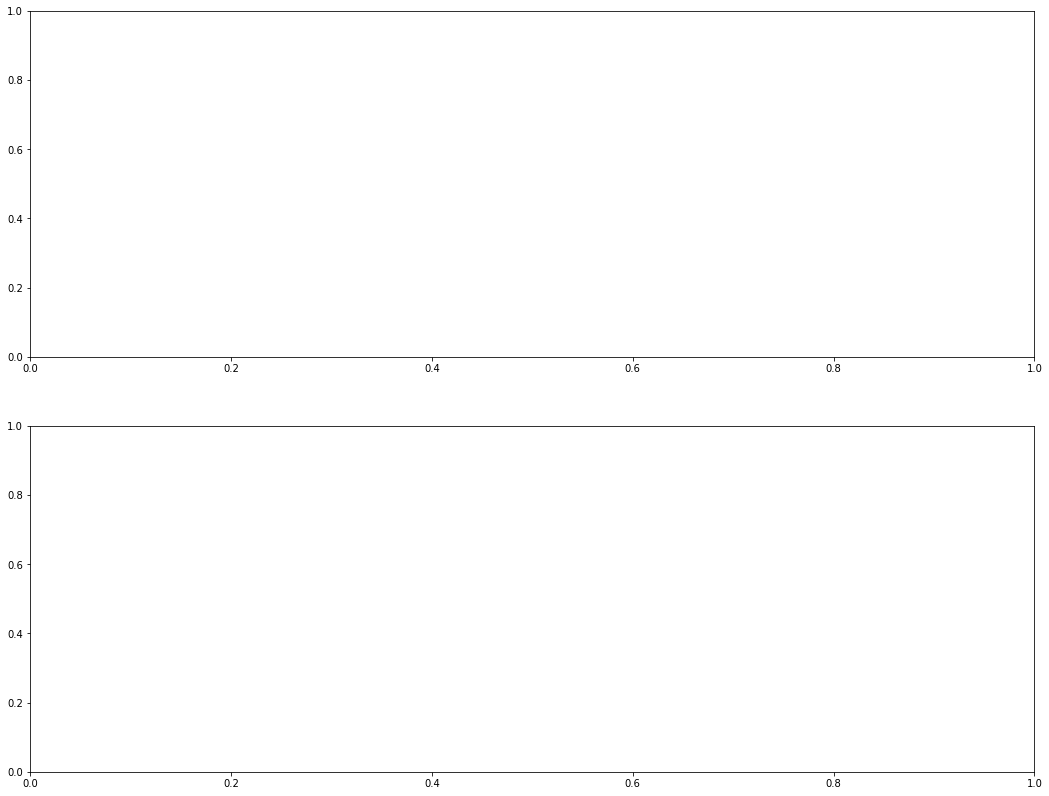

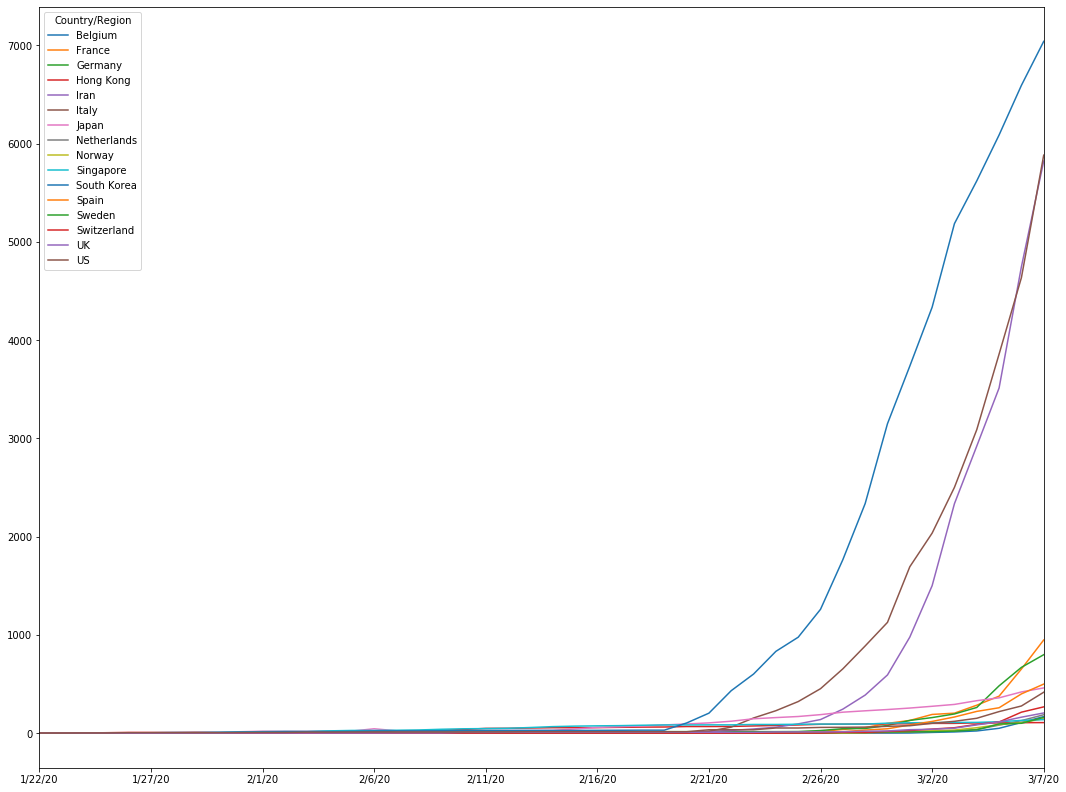

In [143]:
# import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

confirmed_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dead_csv      = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

confirmed = pd.read_csv(confirmed_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
dead      = pd.read_csv(dead_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
recovered = pd.read_csv(recovered_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
# 
min_threshold_confirmed_cases = 200
max_threshold_confirmed_cases = 20000 # let's remove china for now. 
columns = list(confirmed)
selected  = []
deaths    = []
mortality_rate = []
for i in columns: 
    if confirmed[i][-1] > threshold_confirmed_cases and confirmed[i][-1] < max_threshold_confirmed_cases and i != 'Others': 
      selected.append(i)
      deaths.append(dead[i][-1])
      mortality_rate.append(100*(dead[i][-1])/confirmed[i][-1])

# print(deaths)
# print(selected)
subset = confirmed.loc[:,selected]

plt.rcParams['figure.figsize'] = [18, 14]
fig, axes = plt.subplots(2)
ax1 = plt.subplot(212)
subset.plot()
ax1.title('Coronavirus-19 Cases')
ax1.ylabel('confirmed cases')
ax1.xticks(rotation=45)
ax1.grid()

ax2 = plt.subplot(212)
# second plot is ratio of deaths/confirmed cases. 
ax2.bar(selected,mortality_rate, width=0.5, color='b', align='center')
ax2.grid()

plt.show()

